In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
import cv2
from google.colab.patches import cv2_imshow
import dlib
import urllib.request # Import the urllib.request module
!pip install dlib


**# Haarcascade**

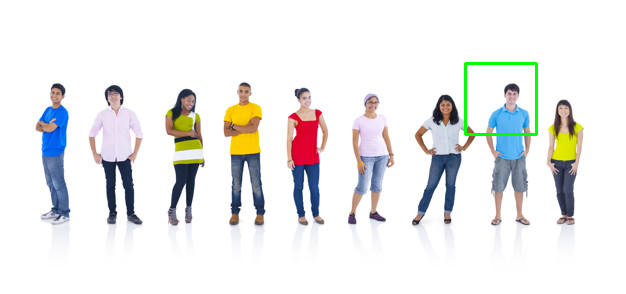

In [11]:
# Haarcascade
imagem = cv2.imread('/content/drive/MyDrive/Visao Computacional Guia Completo/Images/people3.jpg')
imagem_cinza = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)
# cria o detector Haarcascade, arquivo ja treinado
detector_haarcascade = cv2.CascadeClassifier('/content/drive/MyDrive/Visao Computacional Guia Completo/Cascades/haarcascade_frontalface_default.xml')
# cria as deteccoes
detecccoes = detector_haarcascade.detectMultiScale(imagem_cinza, scaleFactor=1.001, minNeighbors=5, minSize= (5,5))
for (x, y, l, a) in detecccoes:
  cv2.rectangle(imagem, (x, y), (x + l, y + a), (0, 255, 0), 2)
cv2_imshow(imagem)

# HOG

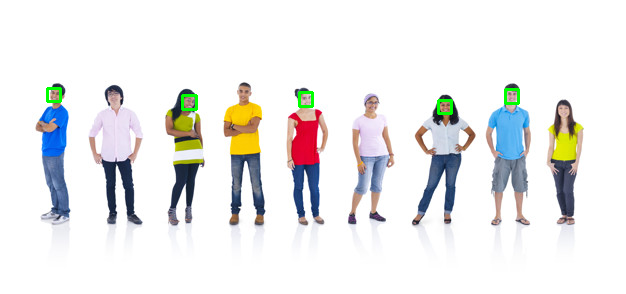

In [12]:
# Project HOG - nao precisa enviar parametro (imagem_cinza) = acerto maior que 50%
imagem = cv2.imread('/content/drive/MyDrive/Visao Computacional Guia Completo/Images/people3.jpg')
detector_hog = dlib.get_frontal_face_detector()
detecccoes = detector_hog(imagem, 4) # mudando o fator de escala para 4
for face in detecccoes:
  cv2.rectangle(imagem, (face.left(), face.top()), (face.right(), face.bottom()), (0, 255, 0), 2)
cv2_imshow(imagem)



# CNN

In [13]:
# Project CNN (tambem fator de escala 4)
imagem = cv2.imread('/content/drive/MyDrive/Visao Computacional Guia Completo/Images/people3.jpg')
detector_cnn = dlib.cnn_face_detection_model_v1('/content/drive/MyDrive/Visao Computacional Guia Completo/Weights/mmod_human_face_detector.dat')
detecccoes = detector_cnn(imagem, 4)
for detection in detecccoes:
  # Dlib CNN detector returns a mmod_rect object which has a .rect attribute
  face = detection.rect
  confidence = detection.confidence
  l, t, r, b = face.left(), face.top(), face.right(), face.bottom()
  print(f"Confidence: {confidence:.4f}")
  cv2.rectangle(imagem, (l, t), (r, b), (0, 255, 0), 2)
cv2_imshow(imagem)


RuntimeError: Error while calling cudaOccupancyMaxPotentialBlockSize(&num_blocks,&num_threads,K) in file /tmp/.tmpAmKoPO/sdists-v9/pypi/dlib/19.24.6/JxDrwaAs6QBtviDChgF56/src/dlib/cuda/cuda_utils.h:164. code: 222, reason: the provided PTX was compiled with an unsupported toolchain.

Confiança: 0.5514
Confiança: 0.2103
Confiança: 0.1837
Confiança: 0.1276
Confiança: 0.1257
Confiança: -0.0813
Confiança: -0.1440
Confiança: -0.8181
Confiança: -0.8906
Confiança: -0.9923


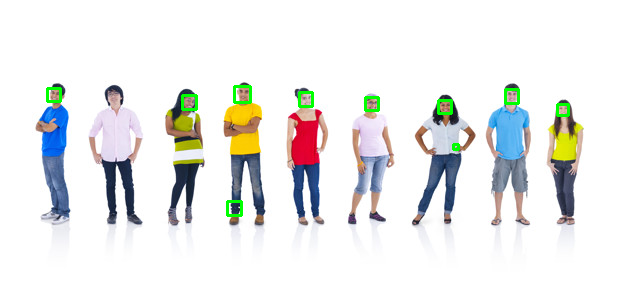

In [14]:
# tentar outro  codigo para func direto
# Carregar imagem
imagem = cv2.imread('/content/drive/MyDrive/Visao Computacional Guia Completo/Images/people3.jpg')

# Inicializar detector HOG
detector_hog = dlib.get_frontal_face_detector()

# Usar detector com retorno de confiança
# A função run retorna: (dets, scores, idx)
dets, scores, idx = detector_hog.run(imagem, 4, -1)
# 4: fator de upsample (como zoom — mais alto, mais preciso mas mais lento). # -1: retorna todas as detecções, independentemente da confiança mínima.
# dets: lista de retângulos das faces detectadas. # scores: lista de pontuações de confiança (quanto maior, melhor). # idx: índice do classificador que detectou (você pode ignorar isso agora).

# Desenhar retângulos e imprimir confidências
for face, score in zip(dets, scores): # score é uma pontuação numérica que mostra o quão confiante o classificador está de que aquela região realmente contém um rosto.
  l, t, r, b = face.left(), face.top(), face.right(), face.bottom()
  print(f"Confiança: {score:.4f}")
  cv2.rectangle(imagem, (l, t), (r, b), (0, 255, 0), 2)

# Mostrar imagem
cv2_imshow(imagem)

# Confiança: 1.1823 → detecção forte (quase certeza de que é uma face) Confiança: -0.0921 → detecção fraca (provavelmente não é uma face)
# dets, scores, idx = detector_hog.run(imagem, upsample_num_times, adjust_threshold)
# upsample_num_times = 4: aumenta a resolução da imagem internamente para encontrar rostos menores. Valor maior = mais lento, mas detecta mais rostos pequenos.
# adjust_threshold = -1: não filtra por score. Se você quiser filtrar apenas detecções confiáveis, pode usar: adjust_threshold = 0.5 → retorna só detecções com score maior que 0.5.
# exibir o score na imagem
# for face, score in zip(dets, scores):
#  l, t, r, b = face.left(), face.top(), face.right(), face.bottom()
#  cv2.rectangle(imagem, (l, t), (r, b), (0, 255, 0), 2)
#  cv2.putText(imagem, f"{score:.2f}", (l, t - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 1)


